# Import Libraries

In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

# Download Data

In [2]:
# Set Variables
time_period = 30
ticker_low = "GGAL"
adr_mult_low = 10  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001114700/000111470023000012/ggal-20221231.htm
ticker_high = "EDN"
adr_mult_high = 20  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001395213/000129281423001639/edndorm20f_2022.htm

In [3]:
# Create Start / End
start_date = (datetime.now() - timedelta(days=time_period)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

In [4]:
# Download Data
df_stock_low = yf.download(f'{ticker_low}.BA', start=start_date, end=end_date)
df_adr_low = yf.download(ticker_low, start=start_date, end=end_date)
df_stock_high = yf.download(f'{ticker_high}.BA', start=start_date, end=end_date)
df_adr_high = yf.download(ticker_high, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Create CCL Tables

In [5]:
# Rename Columns
df_stock_low = df_stock_low.rename(columns={'Close': 'Close_Stock'})
df_adr_low = df_adr_low.rename(columns={'Close': 'Close_ADR'})
df_stock_high = df_stock_high.rename(columns={'Close': 'Close_Stock'})
df_adr_high = df_adr_high.rename(columns={'Close': 'Close_ADR'})

In [6]:
# Combine Tables
df_low = pd.concat([df_stock_low['Close_Stock'], df_adr_low[f'Close_ADR']], axis=1)
df_high = pd.concat([df_stock_high['Close_Stock'], df_adr_high[f'Close_ADR']], axis=1)

In [7]:
# Calculate Ratio
df_low['Ratio'] = df_low['Close_Stock'] / df_low['Close_ADR']
df_low['CCL'] = df_low['Ratio'] * adr_mult_low
df_high['Ratio'] = df_high['Close_Stock'] / df_high['Close_ADR']
df_high['CCL'] = df_high['Ratio'] * adr_mult_high

In [8]:
# Rename Columns
df_low = df_low.rename(columns={'CCL': f'CCL_{ticker_low}'})
df_high = df_high.rename(columns={'CCL': f'CCL_{ticker_high}'})

In [9]:
# Combine Tables
df = pd.concat([df_low[f'CCL_{ticker_low}'], df_high[f'CCL_{ticker_high}']], axis=1)
df

,CCL_GGAL,CCL_EDN
Date,,
2023-05-29,NaN,NaN
2023-05-30,470.809282,489.999997
2023-05-31,490.775058,493.198739
2023-06-01,494.044649,503.905458
2023-06-02,494.331644,492.710301
2023-06-05,492.781816,496.923106
2023-06-06,489.519030,487.760180
2023-06-07,489.241396,495.458448
2023-06-08,488.555856,498.132429


# Plot CCL

In [10]:
# Melt Tables
df_melted = df.reset_index().melt('Date', var_name='Instrument', value_name='CCL_Rate')
df_melted

,Date,Instrument,CCL_Rate
0,2023-05-29,CCL_GGAL,NaN
1,2023-05-30,CCL_GGAL,470.809282
2,2023-05-31,CCL_GGAL,490.775058
3,2023-06-01,CCL_GGAL,494.044649
4,2023-06-02,CCL_GGAL,494.331644
5,2023-06-05,CCL_GGAL,492.781816
6,2023-06-06,CCL_GGAL,489.519030
7,2023-06-07,CCL_GGAL,489.241396
8,2023-06-08,CCL_GGAL,488.555856
9,2023-06-09,CCL_GGAL,488.723813


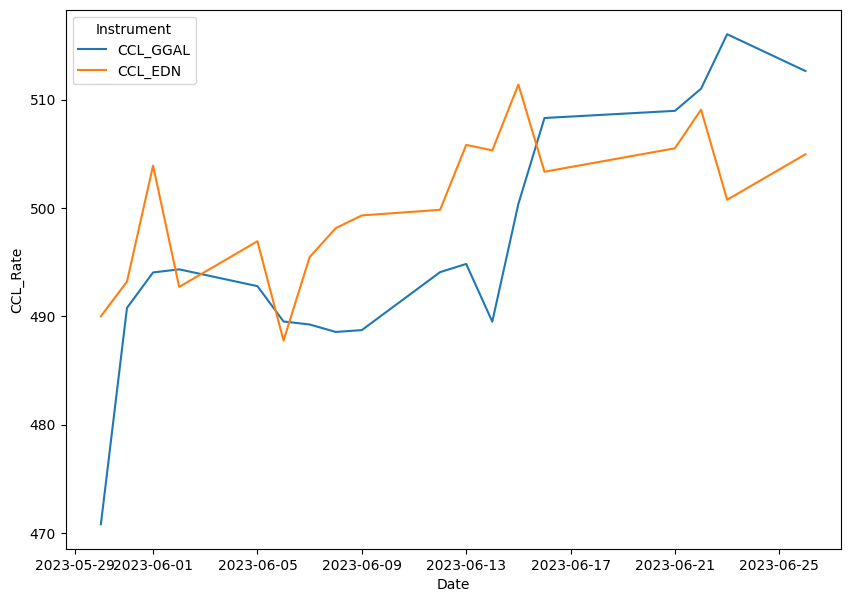

In [11]:
# Plot
plt.figure(figsize=(10, 7))
sns.lineplot(x='Date', y='CCL_Rate', hue='Instrument', data=df_melted)
plt.show()

# Once Cycle

In [12]:
# Example walking through one round-trip transaction
## Must determine round trip cycle duration and fees(intermediary,depositor,custodian), taxes

In [13]:
ticker_high

'EDN'

In [14]:
ticker_low

'GGAL'

In [15]:
df_adr_high.iloc[-1, :]['Close_ADR']

15.109999656677246

In [16]:
# 1. Purchase High ADR in NYSE
##TODO:determine transaction costs, parking period
adr_high = df_adr_high.iloc[-1, :]['Close_ADR']
usd_1 = -adr_high
usd_1

-15.109999656677246

In [17]:
# Check ADR High Multiplier
##American Depositary Shares, or ADSs, evidenced by American Depositary Receipts, each representing X Class B Common Shares
adr_mult_high

20

In [18]:
# Check ADR High Stock Price
stock_high = df_stock_high.iloc[-1, :]['Close_Stock']
stock_high

428.45001220703125

In [19]:
# 2. Transfer ADR(NYSE) to Stock(Merval) and liquidate into pesos
##TODO:determine transfer and liquidation costs, parking costs
##TODO:determine process / protocol for transfer
ars_1 = adr_mult_high * stock_high
ars_1

8569.000244140625

In [20]:
# Check Stock Low Price
stock_low = df_stock_low.iloc[-1, :]['Close_Stock']
stock_low

900.7000122070312

In [21]:
# Check Stock Low ADR Multipler
adr_mult_low

10

In [22]:
# Purchase Stock(Merval) x ADR Multipler
ars_2 = stock_low * adr_mult_low
ars_2

9007.000122070312

In [23]:
# Calculate AR$ Balance
ars_balance = ars_1 - ars_2
ars_balance

-437.9998779296875

In [24]:
# Check ADR Low Price
adr_low = df_adr_low.iloc[-1,:]['Close_ADR']
adr_low

16.770000457763672

In [25]:
# Convert from Stock(Merval) to ADR(NYSE) and liquidate into dollars
##TODO:determine transfer and liquidation costs, parking costs
##TODO:determine process / protocol for transfer
usd_2 = adr_low
usd_2

16.770000457763672

In [26]:
# Check USD Balance
usd_balance = usd_1 + usd_2
usd_balance

1.6600008010864258

In [27]:
# Check ARS Balance
ars_balance

-437.9998779296875

In [28]:
ars_balance/usd_balance

-263.8552208185854

# Index

In [34]:
companies = [
    #'BBAR',
    #'BMA',
    'CEPU',
    'CRESY',
    'EDN',
    'GGAL',
    'SUPV',
    'IRS',
    'LOMA',
    'PAM',
    'TEO',
    'TS',
    'TX',
    'TGS']

multipliers = {
    #'BBAR': 3,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0000913059/000119312523118482/d264052d20f.htm
    #'BMA': 1,   #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001347426/000119312523126614/d266368d20f.htm
    'CEPU': 10, #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001717161/000165495423005229/cepu_20f.htm
    'CRESY': 1, #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001034957/000165495422014335/abc_20f.htm
    'EDN': 20,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001395213/000129281423001639/edndorm20f_2022.htm
    'GGAL': 10, #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001114700/000119312522116900/d248187d20f.htm
    'SUPV': 5,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001517399/000155837023006859/tmb-20221231x20f.htm
    'IRS': 10,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0000933267/000165495422014187/irsa_20f.htm
    'LOMA': 5,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001711375/000171137523000005/loma-20221231.htm
    'PAM': 25,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001469395/000129281423001936/pamform20f_2022.htm
    'TEO': 5,   #https://www.sec.gov/ix?doc=/Archives/edgar/data/0000932470/000110465923034541/teo-20221231x20f.htm
    'TS': 1,    #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001190723/000155485523000209/ts-20221231.htm
    'TX': 1,    #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001342874/000134287423000021/tx-20221231.htm
    'TGS': 1   #https://www.sec.gov/ix?doc=/Archives/edgar/data/0000931427/000114036123020256/brhc20051753_20f.htm
    }

In [35]:
data_dict = {}
one_month_ago = (pd.Timestamp.today() - pd.DateOffset(months=1)).strftime('%Y-%m-%d')
now = pd.Timestamp.today().strftime('%Y-%m-%d')

In [36]:
for company in companies:
    try:
        # Get the data for company and company.BA
        data_ADR = yf.download(company, start=one_month_ago, end=now)
        data_local = yf.download(f'{company}.BA', start=one_month_ago, end=now)

        # Check if the data is valid
        if data_ADR.empty or data_local.empty:
            print(f"Data for {company} or {company}.BA is empty. Skipping this ticker.")
            continue

        # Merge the dataframes
        data_ADR = data_ADR.rename(columns={'Close': f'Close_{company}'})
        data_local = data_local.rename(columns={'Close': f'Close_{company}.BA'})
        data = pd.concat([data_ADR[f'Close_{company}'], data_local[f'Close_{company}.BA']], axis=1)

        # Get the specific multiplier for the company from the dictionary
        multiplier = multipliers.get(company, 1)

        # Calculate company.BA / company * multiplier and add it to the dataframe
        data[f'Ratio_{company}'] = (data[f'Close_{company}.BA'] / data[f'Close_{company}']) * multiplier

        # Store the dataframe in the dictionary
        data_dict[company] = data
    except Exception as e:
        print(f"An exception occurred while processing {company}: {str(e)}")
        continue

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRESY.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for CRESY or CRESY.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['IRS.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for IRS or IRS.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['PAM.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for PAM or PAM.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TEO.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for TEO or TEO.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TS.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for TS or TS.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TX.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for TX or TX.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TGS.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for TGS or TGS.BA is empty. Skipping this ticker.


In [39]:
# Create a dataframe for composite index
composite_index = pd.DataFrame(index=data_dict[list(data_dict.keys())[0]].index)
composite_index['composite_ratio'] = np.nan

for company in data_dict:
    composite_index['composite_ratio'] += data_dict[company][f'Ratio_{company}']

composite_index['composite_ratio'] /= len(companies)

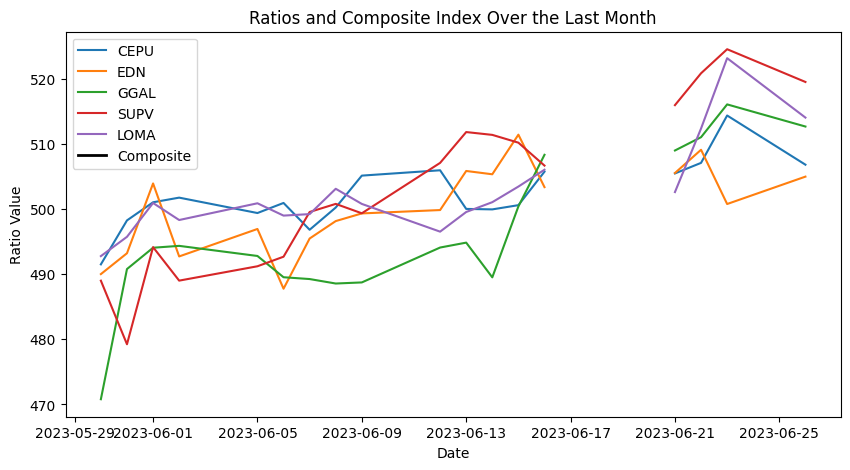

In [40]:
# Create a plot
plt.figure(figsize=(10,5))
for company in companies:
    if company in data_dict:
        plt.plot(data_dict[company].index, data_dict[company][f'Ratio_{company}'], label=company)
plt.plot(composite_index.index, composite_index['composite_ratio'], label='Composite', color='black', linewidth=2)
plt.legend()
plt.title('Ratios and Composite Index Over the Last Month')
plt.xlabel('Date')
plt.ylabel('Ratio Value')
plt.show()

# Arbitrage Scanner

In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define list of companies and their multipliers
companies = ['CEPU', 'CRESY', 'EDN', 'GGAL', 'SUPV', 'IRS', 'LOMA', 'PAM', 'TEO', 'TS', 'TX', 'TGS']
multipliers = {'CEPU': 10, 'CRESY': 1, 'EDN': 20, 'GGAL': 10, 'SUPV': 5, 'IRS': 10, 'LOMA': 5, 'PAM': 25, 'TEO': 5, 'TS': 1, 'TX': 1, 'TGS': 1}

# Initialize data_dict to store data for each company
data_dict = {}

# Define start and end dates
one_month_ago = (pd.Timestamp.today() - pd.DateOffset(months=1)).strftime('%Y-%m-%d')
now = pd.Timestamp.today().strftime('%Y-%m-%d')

for company in companies:
    # Download data for each company
    data_ADR = yf.download(company, start=one_month_ago, end=now)
    data_local = yf.download(f'{company}.BA', start=one_month_ago, end=now)

    if data_ADR.empty or data_local.empty:
        print(f"Data for {company} or {company}.BA is empty. Skipping this ticker.")
        continue

    data_ADR = data_ADR.rename(columns={'Close': f'Close_{company}'})
    data_local = data_local.rename(columns={'Close': f'Close_{company}.BA'})
    data = pd.concat([data_ADR[f'Close_{company}'], data_local[f'Close_{company}.BA']], axis=1)
    multiplier = multipliers.get(company, 1)

    # Calculate company.BA / company * multiplier and add it to the dataframe
    data[f'Ratio_{company}'] = (data[f'Close_{company}.BA'] / data[f'Close_{company}']) * multiplier
    data_dict[company] = data

# Create a dataframe for composite index
composite_index = pd.DataFrame(index=data_dict[list(data_dict.keys())[0]].index)
composite_index['composite_ratio'] = np.nan

for company in data_dict:
    composite_index['composite_ratio'] += data_dict[company][f'Ratio_{company}']

composite_index['composite_ratio'] /= len(data_dict)

# Begin cycle for index of stocks
usd_1 = 0
ars_1 = 0

for company in companies:
    if company in data_dict:
        adr_high = data_dict[company].iloc[-1][f'Close_{company}']
        stock_high = data_dict[company].iloc[-1][f'Close_{company}.BA']
        mult_high = multipliers[company]

        usd_1 -= adr_high
        ars_1 += mult_high * stock_high

usd_2 = ars_1 / composite_index.iloc[-1]['composite_ratio']
usd_balance = usd_1 + usd_2

# Display results
print(f"Initial USD spent: {usd_1}")
print(f"Final ARS balance: {ars_1}")
print(f"Final USD balance: {usd_balance}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRESY.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for CRESY or CRESY.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['IRS.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for IRS or IRS.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['PAM.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for PAM or PAM.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TEO.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for TEO or TEO.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TS.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for TS or TS.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TX.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for TX or TX.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TGS.BA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data for TGS or TGS.BA is empty. Skipping this ticker.
Initial USD spent: -48.8199999332428
Final ARS balance: nan
Final USD balance: nan
